# Regularização e Overfitting

Vamos considerar um conjunto de dados simples, em que a primeira coluna da matriz de features X_poly será obtida a partir de uma certa amostragem, e as demais colunas serão potências da primeira, até o grau 5. 

Associado a matriz de features está um vetor target y.

In [8]:
import numpy as np
from sklearn.metrics import root_mean_squared_error

# Dados
rng = np.random.RandomState(0)
X = np.linspace(-3, 3, 10).reshape(-1, 1)
y = 0.5 * X[:, 0]**2 + 0.3 * X[:, 0] + 1 + rng.randn(10) * 0.5

# Cria features polinomiais (grau 5)
X_poly = np.hstack([X**i for i in range(1, 6)])

print(f"Matriz X com features polinomiais:\n {np.round(X_poly, 2)}")
print(f"\nVetor y:\n {np.round(y, 2)}")

Matriz X com features polinomiais:
 [[-3.000e+00  9.000e+00 -2.700e+01  8.100e+01 -2.430e+02]
 [-2.330e+00  5.440e+00 -1.270e+01  2.964e+01 -6.916e+01]
 [-1.670e+00  2.780e+00 -4.630e+00  7.720e+00 -1.286e+01]
 [-1.000e+00  1.000e+00 -1.000e+00  1.000e+00 -1.000e+00]
 [-3.300e-01  1.100e-01 -4.000e-02  1.000e-02 -0.000e+00]
 [ 3.300e-01  1.100e-01  4.000e-02  1.000e-02  0.000e+00]
 [ 1.000e+00  1.000e+00  1.000e+00  1.000e+00  1.000e+00]
 [ 1.670e+00  2.780e+00  4.630e+00  7.720e+00  1.286e+01]
 [ 2.330e+00  5.440e+00  1.270e+01  2.964e+01  6.916e+01]
 [ 3.000e+00  9.000e+00  2.700e+01  8.100e+01  2.430e+02]]

Vetor y:
 [5.48 3.22 2.38 2.32 1.89 0.67 2.28 2.81 4.37 6.61]


Vamos, primeiramente, analisar o comportamento de um modelo linear sem regularização.

=== Erros de treino e teste ===
Linear sem regularização - RMSE treino: 0.153,  RMSE teste: 2.520


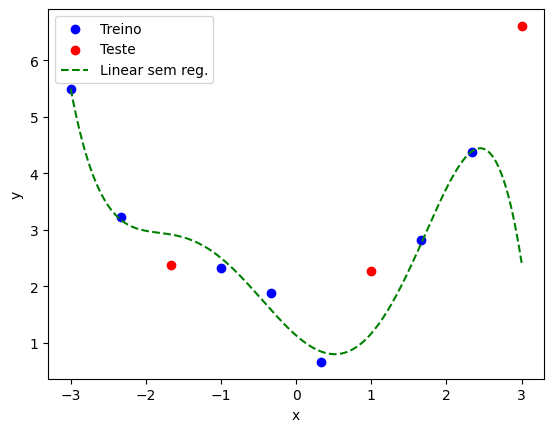

In [9]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, LinearRegression


# Divide em treino/teste
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=1)

# Modelos linear sem regularização
linear_sem_reg = LinearRegression().fit(X_train, y_train)

# Previsões
y_pred_train = linear_sem_reg.predict(X_train)
y_pred_test = linear_sem_reg.predict(X_test)

# Erros
print("=== Erros de treino e teste ===")
print(f"Linear sem regularização - RMSE treino: {root_mean_squared_error(y_train, y_pred_train):.3f},  RMSE teste: {root_mean_squared_error(y_test, y_pred_test):.3f}")

# Visualização
x_plot = np.linspace(-3, 3, 200).reshape(-1, 1)
X_plot_poly = np.hstack([x_plot**i for i in range(1, 6)])
plt.scatter(X_train[:, 0], y_train, color="blue", label="Treino")
plt.scatter(X_test[:, 0], y_test, color="red", label="Teste")
plt.plot(x_plot, linear_sem_reg.predict(X_plot_poly), "g--", label="Linear sem reg.")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()


Apesar do modelo ter se ajustado bem aos dados de treino (em azul), o desempenho nos dados de teste (em vermelho) não foi tão bom.

O modelo linear se ajustou muito aos dados de treino e acabou não generalizando tão bem para dados ainda não vistos (_overfitting_).

Esse problema pode ser diminuído com o uso da regularização.

=== Erros de treino e teste ===
Ridge - RMSE treino: 0.165,  RMSE teste: 2.047


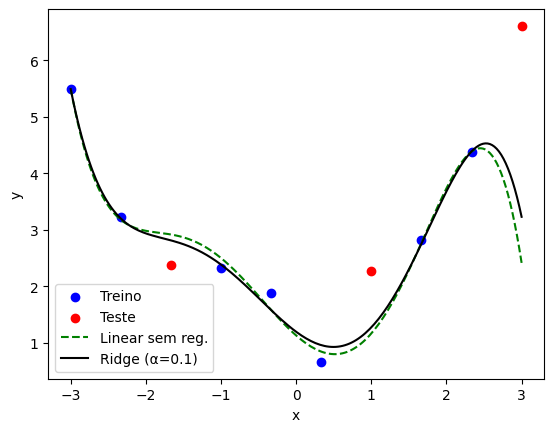

In [15]:
# Modelo com regularização
ridge = Ridge(alpha=0.1).fit(X_train, y_train)

# Previsões
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

# Erros
print("=== Erros de treino e teste ===")
print(f"Ridge - RMSE treino: {root_mean_squared_error(y_train, y_pred_train_ridge):.3f},  RMSE teste: {root_mean_squared_error(y_test, y_pred_test_ridge):.3f}")

# Visualização
x_plot = np.linspace(-3, 3, 200).reshape(-1, 1)
X_plot_poly = np.hstack([x_plot**i for i in range(1, 6)])
plt.scatter(X_train[:, 0], y_train, color="blue", label="Treino")
plt.scatter(X_test[:, 0], y_test, color="red", label="Teste")
plt.plot(x_plot, linear_sem_reg.predict(X_plot_poly), "g--", label="Linear sem reg.")
plt.plot(x_plot, ridge.predict(X_plot_poly), "k-", label="Ridge (α=0.1)")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Perceba que ao usar o modelo com regularização ridge o erro junto aos dados de treino aumentou, enquanto que o erro junto aos dados de teste diminuiu.

É possível realizar uma busca pelo hiperparâmetro alpha do modelo ridge que minimiza o erro de teste.

=== Variação do hiperparâmetro alpha ===
Ridge (α=0.01) - RMSE teste: 2.466
Ridge (α=0.02) - RMSE teste: 2.433
Ridge (α=0.03) - RMSE teste: 2.381
Ridge (α=0.04) - RMSE teste: 2.300
Ridge (α=0.07) - RMSE teste: 2.176
Ridge (α=0.11) - RMSE teste: 1.995
Ridge (α=0.18) - RMSE teste: 1.742
Ridge (α=0.30) - RMSE teste: 1.414
Ridge (α=0.48) - RMSE teste: 1.025
Ridge (α=0.78) - RMSE teste: 0.625
Ridge (α=1.27) - RMSE teste: 0.361
Ridge (α=2.07) - RMSE teste: 0.501
Ridge (α=3.36) - RMSE teste: 0.795
Ridge (α=5.46) - RMSE teste: 1.058
Ridge (α=8.86) - RMSE teste: 1.258
Ridge (α=14.38) - RMSE teste: 1.394
Ridge (α=23.36) - RMSE teste: 1.471
Ridge (α=37.93) - RMSE teste: 1.496
Ridge (α=61.58) - RMSE teste: 1.470
Ridge (α=100.00) - RMSE teste: 1.390


Text(0, 0.5, 'RMSE teste')

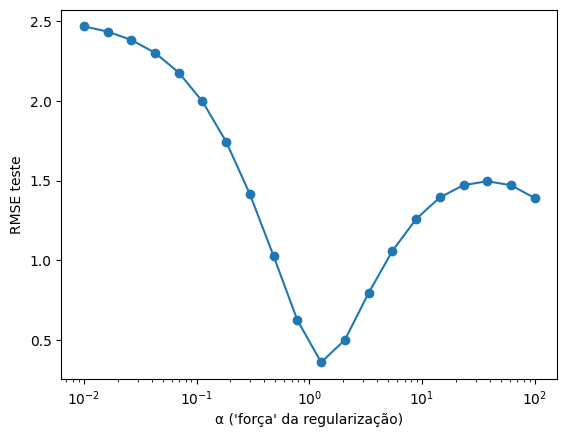

In [14]:
# Busca pelo melhor hiperparâmetro alpha
print("=== Variação do hiperparâmetro alpha ===")
alphas = np.logspace(-2, 2, 20)
rmses = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    y_pred_test_ridge = ridge.predict(X_test)
    rmse = root_mean_squared_error(y_test, y_pred_test_ridge)
    rmses.append(rmse)
    print(f"Ridge (α={alpha:.2f}) - RMSE teste: {rmse:.3f}")

plt.semilogx(alphas, rmses, "o-")
plt.xlabel("α ('força' da regularização)")
plt.ylabel("RMSE teste")

=== Erros de treino e teste ===
Ridge - RMSE treino: 0.332,  RMSE teste: 0.362


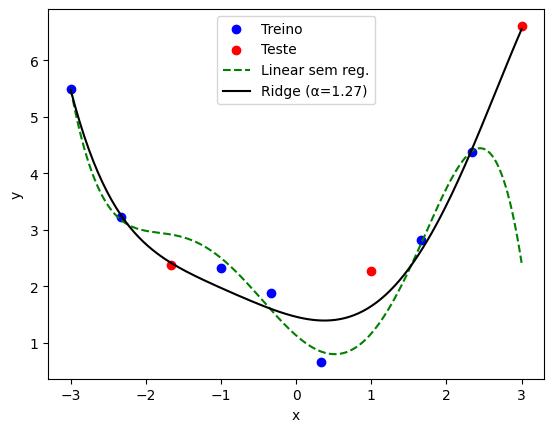

In [12]:
# Modelo com regularização
ridge = Ridge(alpha=1.27).fit(X_train, y_train)

# Previsões
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

# Erros
print("=== Erros de treino e teste ===")
print(f"Ridge - RMSE treino: {root_mean_squared_error(y_train, y_pred_train_ridge):.3f},  RMSE teste: {root_mean_squared_error(y_test, y_pred_test_ridge):.3f}")

# Visualização
x_plot = np.linspace(-3, 3, 200).reshape(-1, 1)
X_plot_poly = np.hstack([x_plot**i for i in range(1, 6)])
plt.scatter(X_train[:, 0], y_train, color="blue", label="Treino")
plt.scatter(X_test[:, 0], y_test, color="red", label="Teste")
plt.plot(x_plot, linear_sem_reg.predict(X_plot_poly), "g--", label="Linear sem reg.")
plt.plot(x_plot, ridge.predict(X_plot_poly), "k-", label="Ridge (α=1.27)")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Porém não é uma boa prática realizar o ajuste de hiperparâmetros com base nos dados de teste (_data snooping_). Devemos realizar o ajuste como se a distribuição dos dados de teste não fosse conhecida. 

Para isso, utilizamos a validação cruzada nos dados de treino, escolhendo o hiperparâmetro que minimize o erro de validação.

RMSE no teste: 1.4704
Melhor hiperparâmetro alpha da validação cruzada: 62.0


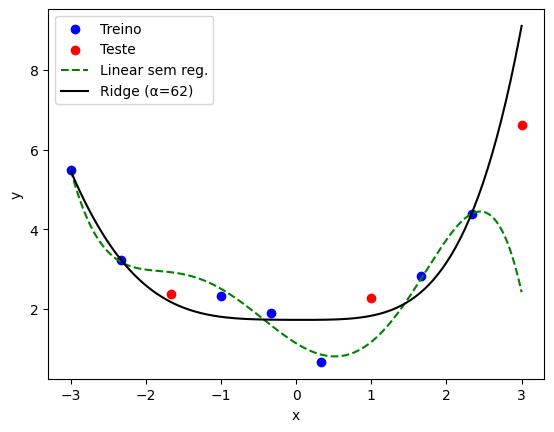

In [13]:
from sklearn.model_selection import GridSearchCV

# Grade de hiperparâmetros
param_grid = {
    "alpha": alphas,
}

# GridSearchCV (métrica: RMSE)
grid = GridSearchCV(
    estimator=Ridge(),
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=5, # Validação cruzada
)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_

# Avaliação no teste
y_pred_test = best_model.predict(X_test)
rmse_test = root_mean_squared_error(y_test, y_pred_test)
print(f"RMSE no teste: {rmse_test:.4f}")
print("Melhor hiperparâmetro alpha da validação cruzada:", np.round(grid.best_params_["alpha"]))

# Visualização
x_plot = np.linspace(-3, 3, 200).reshape(-1, 1)
X_plot_poly = np.hstack([x_plot**i for i in range(1, 6)])
plt.scatter(X_train[:, 0], y_train, color="blue", label="Treino")
plt.scatter(X_test[:, 0], y_test, color="red", label="Teste")
plt.plot(x_plot, linear_sem_reg.predict(X_plot_poly), "g--", label="Linear sem reg.")
plt.plot(x_plot, best_model.predict(X_plot_poly), "k-", label="Ridge (α=62)")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()


Note que o erro de teste obtido pela validação cruzada é maior que o erro de teste encontrado na busca anterior. 

Contudo, o modelo usando a validação cruzada tem uma maior chance de generalizar melhor para dados desconhecidos.